In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

### **Metodo del gradiente a punto fisso**

Nel **metodo del gradiente a punto fisso** si procede con un **passo fisso** lungo la **direzione opposta al gradiente**, poiché il gradiente indica la direzione di **massima crescita** della funzione.  

In formula:

$$
x_{k+1} = x_k - \alpha \nabla f(x_k)
$$

dove:

- $x_k$ è la stima corrente ($x_{new}$ nel codice)  
- $\alpha > 0$ è il passo (step size) fisso  
- $\nabla f(x_k)$ è il gradiente di $f$ in $x_k$



L’obiettivo è muoversi iterativamente nella direzione di **massima discesa** per minimizzare $f(x)$.


In [2]:
# === Metodo di Discesa del Gradiente (base) ===
def GD(df, x0, alpha, E_tol, E_tolx, MAX_ITER=100):
    """
        Metodo di discesa del gradiente a passo fisso.
        df: derivata
        x0 = punto inizale
        alpha: lunghezza del passo
        E_tol: tolleranza sul gradiente
        E-tolx: condizione per la piattezza, vedo distanza su asse x dal minimo in caso di funzioni molto piatte - tolleranza sulla piattezza
        MAX_ITER = numero massimo di iterazioni
    """
    k = 1

    # x_new è il punto che dovrebbe essere il minimo
    x_new = x0 - alpha * df(x0) 
    while np.linalg.norm(df(x_new)) > E_tol and k < MAX_ITER and np.linalg.norm(x_new - x0) > E_tolx:
        x0 = x_new
        x_new = x0 - alpha * df(x0)
        k = k + 1
    return x_new, k

In [3]:
# Grafico andamento del valore di gradiente e funzione rispetto ad una certa iterazione
def GD_Grafico(f, df, x_0, alpha, Etol, Etol_x, MAX_ITER):
    """
        f: funzione
        df: gradiente
        x_0: punto iniziale
        alpha: lunghezza passo
        Etol: tolleranza su gradiente
        Etol_x: tolleranza su piattezza
        MAX_ITER: numero massimo iterazioni
    """
    k = 0
    function = np.zeros([MAX_ITER,])
    gradiente = np.zeros([MAX_ITER,])
    function[k] = f(x_0)
    gradiente[k] = np.linalg.norm(df(x_0))
    x_new = x_0 - alpha * df(x_0)
    while np.linalg.norm(df(x_new)) > Etol and np.linalg.norm(x_new - x_0) > Etol_x and k < MAX_ITER:
        x_0 = x_new
        x_new = x_0 - alpha * df(x_0)
        k = k + 1
        function[k] = f(x_new)
        gradiente[k] = np.linalg.norm(df(x_new))
    return x_new, k, function, gradiente

In [4]:
# Inizializzo i parametri e chiamo la funzione del gradiente
f = lambda x: (x-1)**2 + np.exp(x)
df = lambda x: 2*(x-1) + np.exp(x)
x0, alpha, maxit = 0, 1e-2, 100
x_sol = GD(df, x0, alpha, 1.e-6, 1.e-5, maxit) 
x_true = 0.31492
rel_err = np.abs(x_sol[0] - x_true) / np.abs(x_true)
print(f"Soluzione calcolata: {x_sol[0]:.4f}")
print(f"Errore Relativo: {rel_err:.5f}")

Soluzione calcolata: 0.3040
Errore Relativo: 0.03453


###  **Algoritmo di Backtracking (condizione di Armijo)**

L’**algoritmo di backtracking** serve per scegliere **un passo adattivo** nel metodo del gradiente, garantendo che la funzione obiettivo $ f(x) $ **diminuisca in modo sufficiente** lungo la direzione di discesa.


#### **Idea di base**
Nel metodo del gradiente, un passo troppo grande può far **divergere** l’algoritmo, mentre un passo troppo piccolo lo rende **lento**.  
Il **backtracking** adatta automaticamente il passo $ \alpha $ per mantenere un buon compromesso.


####  **Condizione di Armijo**
Si cerca un valore di $ \alpha $ tale che:

$$
f(x - \alpha \nabla f(x)) \le f(x) - c \, \alpha \, \|\nabla f(x)\|^2
$$

dove:
- $0 < c < 1$ controlla quanto “sufficiente” deve essere la discesa (tipicamente $ c = 10^{-4} $)
- $ \rho \in (0, 1) $ è il **fattore di riduzione** del passo (es. $ \rho = 0.5 $)
- $ \alpha $ parte da un valore iniziale (es. $ \alpha = 1 $) e viene ridotto moltiplicandolo per $ \rho$) finché la condizione non è soddisfatta.


#### **Schema logico dell’algoritmo**
1. Imposta un passo iniziale $ \alpha = 1 $  
2. Verifica la condizione di Armijo  
3. Se **non è soddisfatta**, riduci il passo: $ \alpha = \rho \alpha $  
4. Ripeti finché la discesa è sufficiente  
5. Restituisci il passo trovato ✅

In [5]:
def backtracking(f, df, x_0, alpha=1, rho=0.5, c=0.25):
    """
        Algoritmo di backtracking per la scelta del passo (condizione di Armijo).
        f: funzione
        df: derivata della funzione
        x: punto di partenza
        alpha: lunghezza del passo
        rho: fattore di riduzione del passo (serve per ridurre il passo se è troppo grande)
        c: costante che controlla quanto “sufficiente” deve essere la riduzione della funzione f(x).
    """
    while f(x_0 - alpha * df(x_0)) > f(x_0) - c * alpha * np.linalg.norm(df(x_0))**2:
        alpha = rho * alpha
    return alpha

In [6]:
def gradiente_backtracking(f, df, x_0, Etolf, Etolx, MAX_ITER):
    """
        Gradiente di discesa con PASSO VARIABILE
        f: funzione
        df: gradiente
        x_0: punto iniziale
        alpha: lunghezza passo
        Etolf: tolleranza su gradiente
        Etolx: tolleranza su piattezza
        MAX_ITER: numero massimo iterazioni
    """
    k = 1 # salti una iterazione, facciamo subito backtracking()
    alpha = backtracking(f, df, x_0)
    x_new = x_0 - alpha * df(x_0)
    while np.linalg.norm(df(x_new)) > Etolf and np.linalg.norm(x_new - x_0) > Etolx and k < MAX_ITER:
        x_0 = x_new
        alpha = backtracking(f, df, x_0)
        x_new = x_0 - alpha * df(x_0)
        k = k + 1
    return x_new, k

In [7]:
def gradiente_backtracking_grafico(f, df, x_0, Etolf, Etolx, MAX_ITER):
    """
        Gradiente di discesa con PASSO VARIABILE
        f: funzione
        df: gradiente
        x_0: punto iniziale
        alpha: lunghezza passo
        Etolf: tolleranza su gradiente
        Etolx: tolleranza su piattezza
        MAX_ITER: numero massimo iterazioni
    """
    k = 0 # salti una iterazione, facciamo subito backtracking()
    alpha = backtracking(f, df, x_0)
    x_new = x_0 - alpha * df(x_0)
    function = np.zeros([MAX_ITER,])
    gradiente = np.zeros([MAX_ITER,])
    function[k] = f(x_0)
    gradiente[k] = np.linalg.norm(df(x_0))
    while np.linalg.norm(df(x_new)) > Etolf and np.linalg.norm(x_new - x_0) > Etolx and k < MAX_ITER:
        x_0 = x_new
        alpha = backtracking(f, df, x_0)
        x_new = x_0 - alpha * df(x_0)
        function[k] = f(x_new)
        gradiente[k] = np.linalg.norm(df(x_new))
        k = k + 1
    return x_new, k, function, gradiente

In [8]:
valore_atteso = 0.31492
f = lambda x: (x-1)**2 + np.exp(x)
df = lambda x: 2*(x-1) + np.exp(x)
sol = gradiente_backtracking(f, df, 0, 1.e-6, 1.e-5, 1000)
print(f"Soluzione {sol[0]} in {sol[1]} iterazioni con un errore di {np.abs(valore_atteso - sol[0])}")

Soluzione 0.3149219849493311 in 7 iterazioni con un errore di 1.9849493311241417e-06


**Homework 2** - Trovare i minimi di funzione con i metodi utilizzati in precedenza con funzioni in più variabili


<b><p>Analisi delle funzioni</p></b>
<b>Prima funzione</b>

$f(x_1, x_2) = (x_1 - 5)^2 + (x_2 - 2)^2$ <br>
$\nabla f(x_1, x_2) = (2x_1 - 10, 2x_2 -4)$

In [9]:
f1 = lambda x: (x[0] - 5)**2 + (x[1] - 2)**2
df1 = lambda x: np.array([2 * x[0] - 10, 2 * x[1] - 4]) 

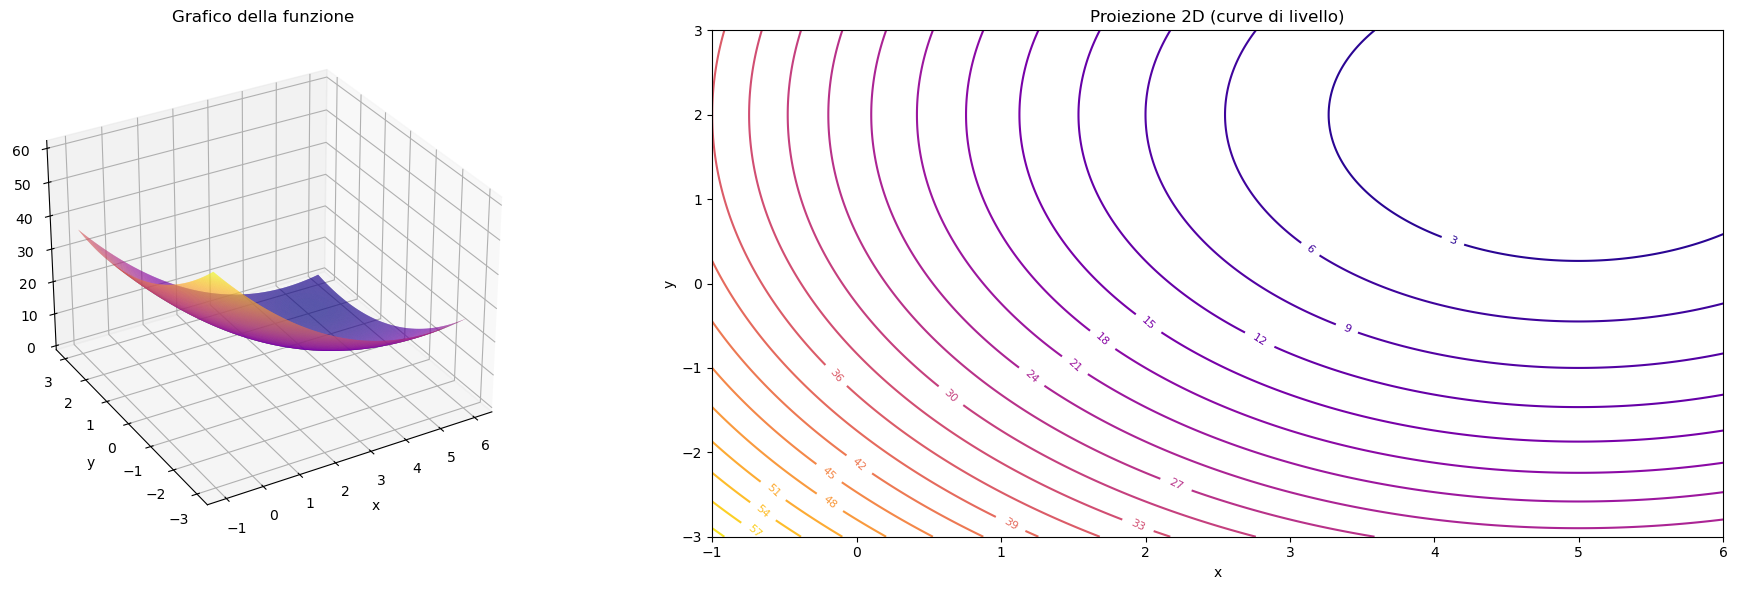

In [10]:
x = np.linspace(-1, 6, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y) # funzione per le griglie bidimensionali
Z = f1([X, Y])
fig = plt.figure(figsize=(20, 6))

# Grafico 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma', rstride=1, cstride=1, linewidth=0, antialiased=True)
ax.set_title("Grafico della funzione")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=30, azim=240) # azim = gradi di rotazione

# Grafico 2D
ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(X, Y, Z, levels=20, cmap='plasma')
ax2.clabel(contours, inline=True, fontsize=8)
ax2.set_title("Proiezione 2D (curve di livello)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()

In [11]:
punti_partenza = [[6,4], [0,0], [1,3], [10,20], [-1,-1]]
for i in punti_partenza:
    sol = gradiente_backtracking(f1, df1, np.array(i), 1.e-6, 1.e-5, 10000)    
    print(f"Punto di partenza {i} -> Soluzione = {sol[0]}, in {sol[1]} iterazioni")

Punto di partenza [6, 4] -> Soluzione = [5. 2.], in 1 iterazioni
Punto di partenza [0, 0] -> Soluzione = [5. 2.], in 1 iterazioni
Punto di partenza [1, 3] -> Soluzione = [5. 2.], in 1 iterazioni
Punto di partenza [10, 20] -> Soluzione = [5. 2.], in 1 iterazioni
Punto di partenza [-1, -1] -> Soluzione = [5. 2.], in 1 iterazioni


<b>Considerazioni (backtracking):</b> modificando il valore dei punti di partenza, l'algoritmo calcola il passo migliore e quindi converge sempre in pochissime iterazioni.

In [12]:
punti_partenza = [[6,4], [0,0], [1,3], [10,20], [-1,-1]]
passo = [0.5, 1, 0.25, 0.1, 0.01]
for i in punti_partenza:
    for j in passo:
        sol_normale = GD(df1, np.array(i), j, 1.e-6, 1.e-5, 10000)
        print(f"Punto di partenza: {i} con passo {j} -> Soluzione = {sol_normale[0]}, in {sol_normale[1]} iterazioni")


Punto di partenza: [6, 4] con passo 0.5 -> Soluzione = [5. 2.], in 1 iterazioni
Punto di partenza: [6, 4] con passo 1 -> Soluzione = [6 4], in 10000 iterazioni
Punto di partenza: [6, 4] con passo 0.25 -> Soluzione = [5.00000381 2.00000763], in 18 iterazioni
Punto di partenza: [6, 4] con passo 0.1 -> Soluzione = [5.00001784 2.00003568], in 49 iterazioni
Punto di partenza: [6, 4] con passo 0.01 -> Soluzione = [5.00021503 2.00043006], in 418 iterazioni
Punto di partenza: [0, 0] con passo 0.5 -> Soluzione = [5. 2.], in 1 iterazioni
Punto di partenza: [0, 0] con passo 1 -> Soluzione = [0 0], in 10000 iterazioni
Punto di partenza: [0, 0] con passo 0.25 -> Soluzione = [4.99999523 1.99999809], in 20 iterazioni
Punto di partenza: [0, 0] con passo 0.1 -> Soluzione = [4.99996346 1.99998538], in 53 iterazioni
Punto di partenza: [0, 0] con passo 0.01 -> Soluzione = [4.99954899 1.99981959], in 461 iterazioni
Punto di partenza: [1, 3] con passo 0.5 -> Soluzione = [5. 2.], in 1 iterazioni
Punto di par

<b>Considerazioni (no backtracking):</b> impostando il valore del passo ad 1 non fa convergere l'algoritmo. Per gli altri valori provati si ottiene sempre lo stesso risultato con numeri di iterazioni diversi. Possiamo inoltre considerare che, con $0,01$ come valore del passo, otteniamo un elevato numero di iterazioni (algoritmo più lento). Viceversa, $0,25$ risulta un buon valore per il passo.

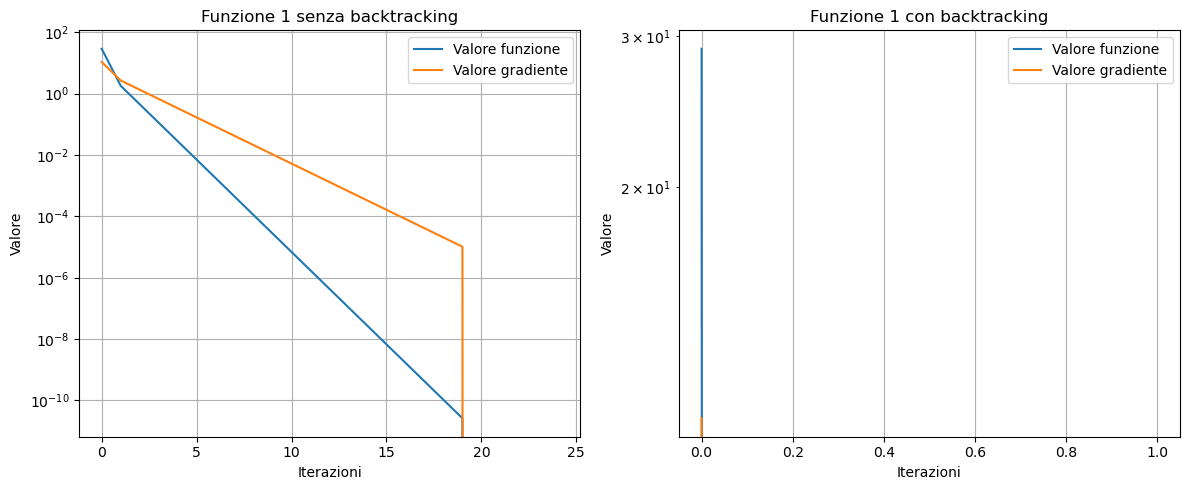

In [13]:
sol_normale, iter, f_array, g_array = GD_Grafico(f1, df1, np.array([0, 0]), 0.25, 1.e-6, 1.e-5, 25)
sol_backtracking, iter_b, f_array_b, g_array_b = gradiente_backtracking_grafico(f1, df1, np.array([0, 0]), 1.e-6, 1.e-5, 2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico senza backtracking
axes[0].plot(f_array, label='Valore funzione')
axes[0].semilogy(g_array, label='Valore gradiente')
axes[0].set_xlabel("Iterazioni")
axes[0].set_ylabel("Valore")
axes[0].set_title("Funzione 1 senza backtracking")
axes[0].grid(True)
axes[0].legend()

# Grafico con backtracking
axes[1].plot(f_array_b, label='Valore funzione')
axes[1].semilogy(g_array_b, label='Valore gradiente')
axes[1].set_xlabel("Iterazioni")
axes[1].set_ylabel("Valore")
axes[1].set_title("Funzione 1 con backtracking")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()



<b>Funzione di Rosenbrock:</b> $f(x_1, x_2)=(1 - x_1)^2 + 100(x_2 - x_1^2)^2$

In [14]:
f2 = lambda x: (1-x[0])**2 + 100*(x[1]-(x[0])**2)**2
df2 = lambda x: np.array([-2*(1-x[0]) - 400*x[0]*(x[1] - (x[0])**2), 200 * (x[1] - x[0]**2)])

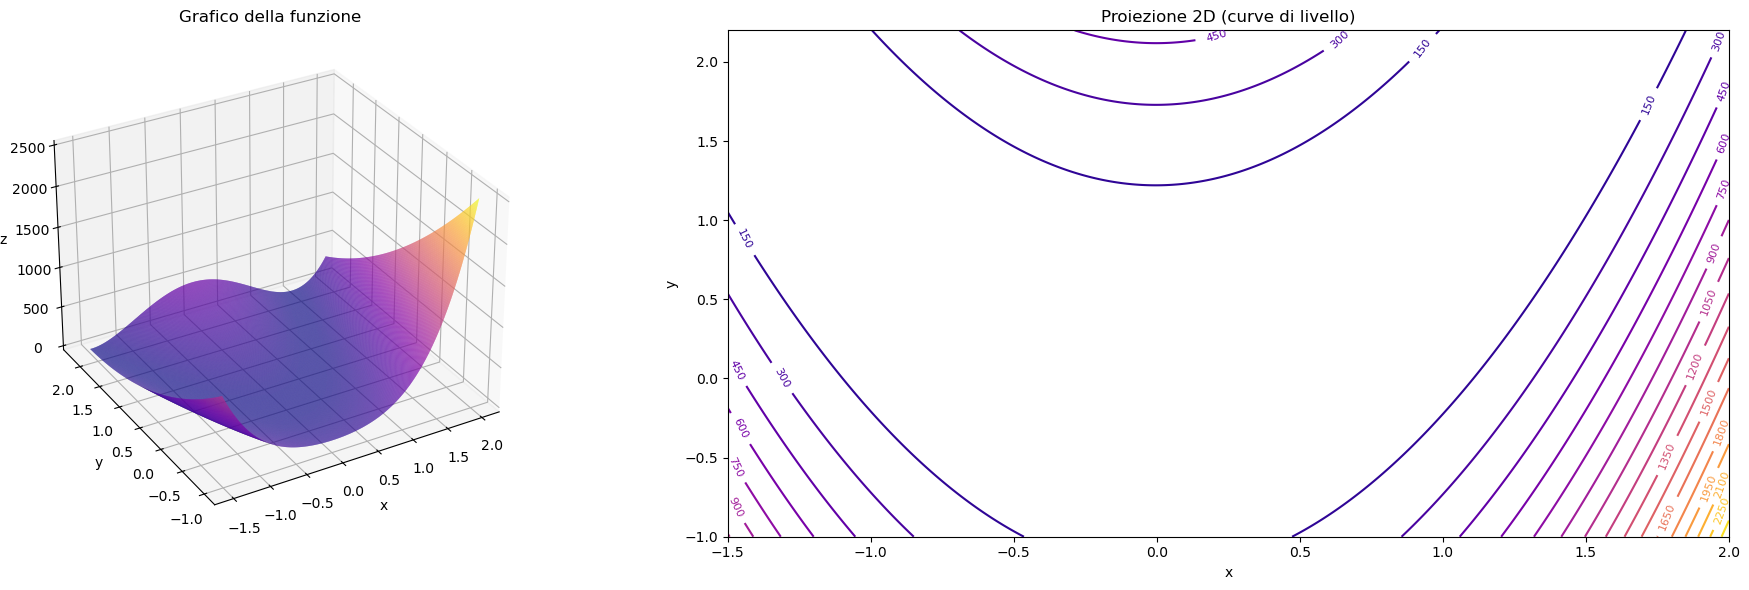

In [15]:
x = np.linspace(-1.5, 2, 400)
y = np.linspace(-1, 2.2, 400)
X, Y = np.meshgrid(x, y) # funzione per le griglie bidimensionali
Z = f2([X, Y])
fig = plt.figure(figsize=(20, 6))

# Grafico 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma', rstride=1, cstride=1, linewidth=0, antialiased=True)
ax.set_title("Grafico della funzione")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=30, azim=240) # azim = gradi di rotazione

# Grafico 2D
ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(X, Y, Z, levels=20, cmap='plasma')
ax2.clabel(contours, inline=True, fontsize=8)
ax2.set_title("Proiezione 2D (curve di livello)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()


In [16]:
warnings.filterwarnings("ignore") # non vedo gli erriori, li disattivo
passi = [0.01, 0.005, 0.001]
punti = [[0, 0], [0.25, 0.5], [0.5, 0], [0.1, 0.75]]
for punto in punti:
    for passo in passi:
        sol_normale = GD(df2, np.array(punto), passo, 1.e-6, 1.e-5, 10000)
        print(f"Punto: {punto}, passo {passo}, Soluzione -> {sol_normale[0]} in {sol_normale[1]} iterazioni")
warnings.filterwarnings("default")


Punto: [0, 0], passo 0.01, Soluzione -> [-inf  inf] in 41 iterazioni
Punto: [0, 0], passo 0.005, Soluzione -> [0.53419238 0.21465105] in 10000 iterazioni
Punto: [0, 0], passo 0.001, Soluzione -> [0.98892415 0.97792635] in 8314 iterazioni
Punto: [0.25, 0.5], passo 0.01, Soluzione -> [nan inf] in 9 iterazioni
Punto: [0.25, 0.5], passo 0.005, Soluzione -> [0.46330448 0.2853615 ] in 10000 iterazioni
Punto: [0.25, 0.5], passo 0.001, Soluzione -> [0.98892325 0.97792458] in 7926 iterazioni
Punto: [0.5, 0], passo 0.01, Soluzione -> [inf inf] in 15 iterazioni
Punto: [0.5, 0], passo 0.005, Soluzione -> [0.53419238 0.21465105] in 10000 iterazioni
Punto: [0.5, 0], passo 0.001, Soluzione -> [0.98892765 0.97793329] in 8031 iterazioni
Punto: [0.1, 0.75], passo 0.01, Soluzione -> [-inf  inf] in 10 iterazioni
Punto: [0.1, 0.75], passo 0.005, Soluzione -> [0.53419238 0.21465105] in 10000 iterazioni
Punto: [0.1, 0.75], passo 0.001, Soluzione -> [0.98892447 0.977927  ] in 8075 iterazioni


<b>Considerazioni (no backtracking):</b> con passo $0.005$ l'algoritmo termina per il cirterio di arresto del numero massimo di iterazioni. L'unico passo che computa il risultato corretto senza esaurire il numero di iterazioni è $0.001$. Tutti gli altri passi portando ad un overflow.

In [17]:
punti = [[0, 0], [0.25, 0.5], [0.5, 0], [0.1, 0.75]]
for punto in punti:
    sol = gradiente_backtracking(f2, df2, punto, 1.e-6, 1.e-5, 10000)
    print(f"Punto: {punto}, Soluzione -> {sol[0]} in {sol[1]} iterazioni")

Punto: [0, 0], Soluzione -> [0.99617386 0.99233929] in 1960 iterazioni
Punto: [0.25, 0.5], Soluzione -> [0.99583741 0.99167489] in 1387 iterazioni
Punto: [0.5, 0], Soluzione -> [0.99602962 0.99205851] in 1869 iterazioni
Punto: [0.1, 0.75], Soluzione -> [0.9958427  0.99167863] in 1822 iterazioni


<b>Considerazioni (backtracking):</b> si noti come, modificando il passo grazie al backtracking, otteniamo sempre una convergenza dell'algoritmo.

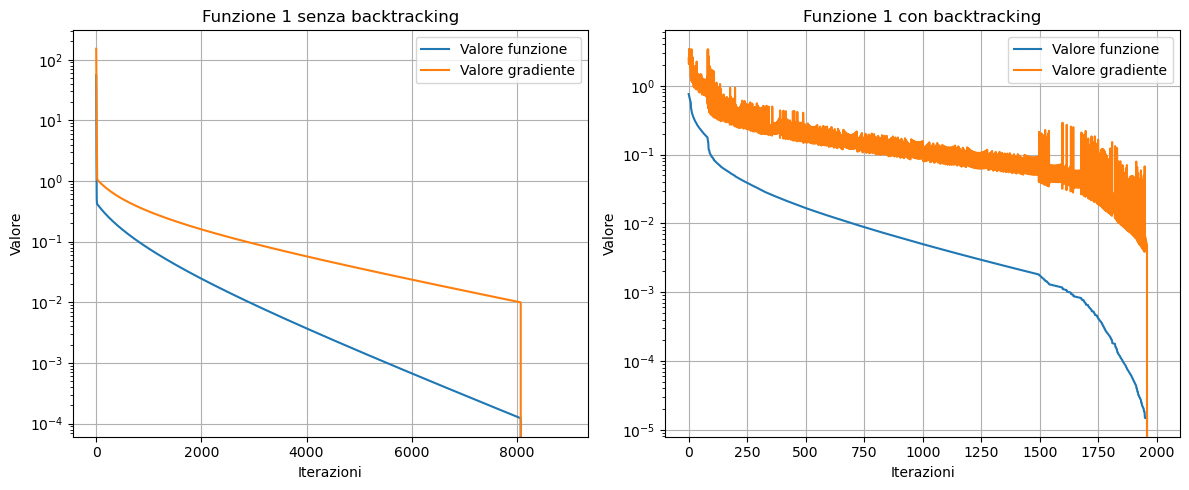

In [18]:
sol_norm_grafico, iter, f_array, g_array = GD_Grafico(f2, df2, [0.1, 0.75], 0.001, 1.e-6, 1.e-5, 8900)
sol_back_grafico, iter, f_array_b, g_array_b = gradiente_backtracking_grafico(f2, df2, [0,0], 1.e-6, 1.e-5, 2000)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico senza backtracking
axes[0].plot(f_array, label='Valore funzione')
axes[0].semilogy(g_array, label='Valore gradiente')
axes[0].set_xlabel("Iterazioni")
axes[0].set_ylabel("Valore")
axes[0].set_title("Funzione 1 senza backtracking")
axes[0].grid(True)
axes[0].legend()

# Grafico con backtracking
axes[1].plot(f_array_b, label='Valore funzione')
axes[1].semilogy(g_array_b, label='Valore gradiente')
axes[1].set_xlabel("Iterazioni")
axes[1].set_ylabel("Valore")
axes[1].set_title("Funzione 1 con backtracking")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


<b>Considerazioni:</b> nel metodo del backtracking il valore del graadiente oscilla parecchio, non possiede più un passo lineare come era visibile nel grafico a passo fisso. Si può quindi notare molto bene il lavoro della funzione $backtracking()$ che modifica il passo ad ogni iterazione.

<b>Minimi quadrati lineari:</b><br><br>
 $f(x)= \frac12||Ax-b||_2^2 $ <br>
$\nabla f(x) = A^T(Ax-b)$

In [19]:
n = 3 # lunghezza righe e colonne
v = np.linspace(0, 1, n) # vettore v nel file
A = np.vander(v, n) # matrice
x_star = np.ones(n) # vettore composto da tutti 1 trasposto (1, 1, 1, ..., 1)
b = A@x_star # @ è il prodotto righe per colonne di matrici

f3 = lambda x: 1/2 * np.linalg.norm(A@x - b)**2
df3 = lambda x: A.T @ (A@x - b)

In [20]:
# con un passo 0.2 possiamo calcolare il minimo di una funzione con precisione fino a 10^-18. Modificando il passo
# possiamo ottenere delle divergenze.
x = np.array([100000, 0.00000001, 20000])

sol = GD(df3, x, 0.2, 1.e-18, 1.e-17, 10000)
print(f"Souzione senza backtracking {sol[0]}, in {sol[1]} iterazioni")

sol = gradiente_backtracking(f3, df3, x, 1.e-18, 1.e-17, 10000)
print(f"Soluzione con backtracking {sol[0]} in {sol[1]} iterazioni")

Souzione senza backtracking [1. 1. 1.], in 10000 iterazioni
Soluzione con backtracking [1. 1. 1.] in 3559 iterazioni
